# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)

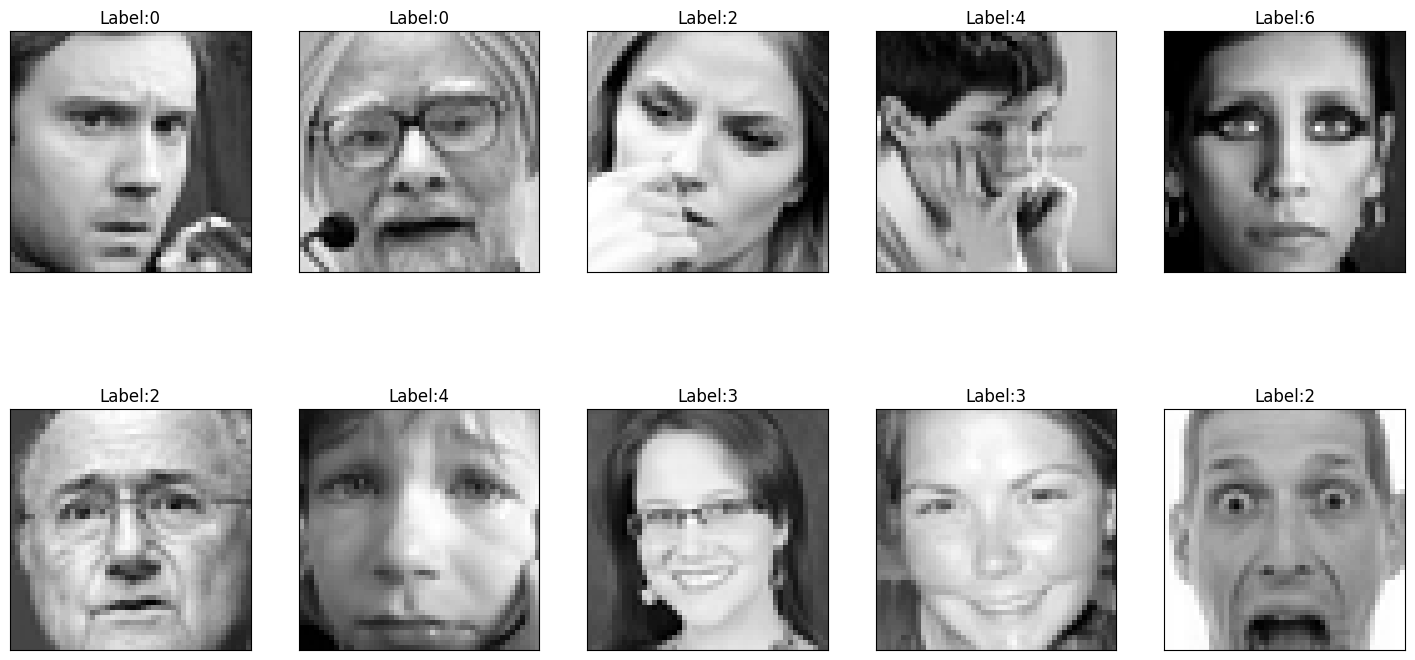

In [6]:
## showing images here
show_img(images, labels)

### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [8]:
# Check for missing values
print("Missing values in the dataset: ", df.isnull().sum().sum())

Missing values in the dataset:  0


In [9]:
# Check for duplicate values
print("Duplicate values in the dataset: ", df.duplicated().sum())

Duplicate values in the dataset:  1793


In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34094 entries, 0 to 34093
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  34094 non-null  int64 
 1   pixels   34094 non-null  object
dtypes: int64(1), object(1)
memory usage: 532.8+ KB


<Axes: xlabel='emotion'>

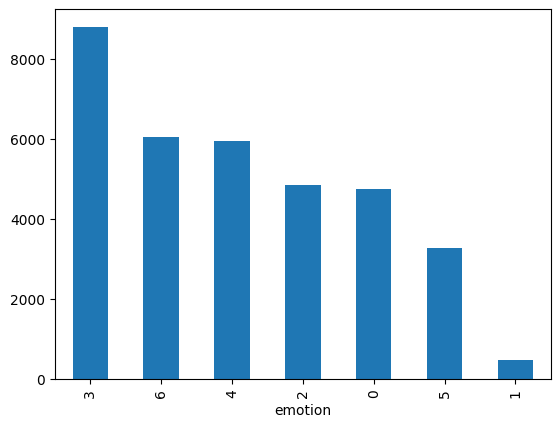

In [11]:
# Count the number of each label
df['emotion'].value_counts().plot(kind='bar')

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

Answer: The code below will produce a scatter plot where each point represents an image projected onto the first two principal components, with colors indicating different emotion labels. This provides a visual representation of how different emotions are distributed in the reduced two-dimensional space.

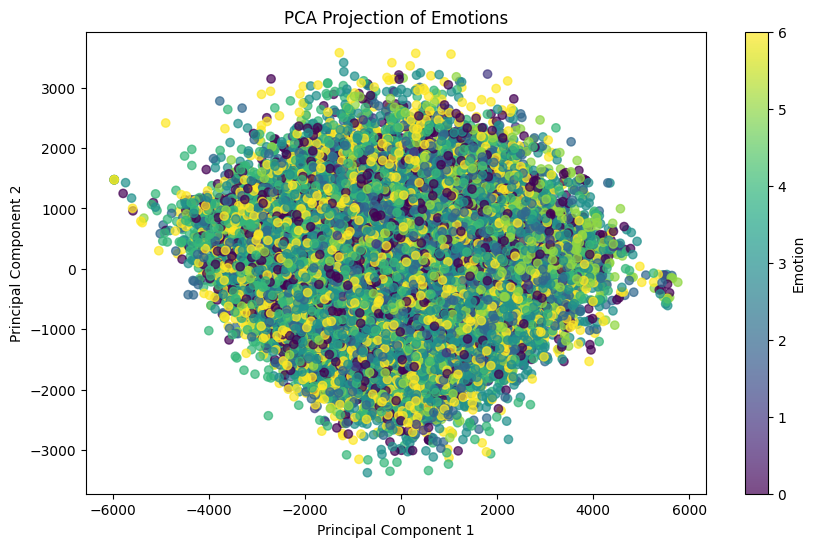

In [12]:
from sklearn.decomposition import PCA

df = pd.DataFrame(df, columns=["emotion", "pixels"])

# Preprocess the Data
df["pixels"] = df["pixels"].apply(lambda x: np.array(list(map(int, x.split()))))

# Find the length of the longest pixel array
max_length = max(df["pixels"].apply(len))

# Pad shorter arrays with zeros
df["pixels"] = df["pixels"].apply(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))

# Stack pixel data into a numpy array
X = np.vstack(df["pixels"].values)
y = df["emotion"].values

# Apply PCA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

def show_pca_image(images: np.ndarray, labels: np.ndarray):
    """
    Visualize PCA results with labels
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(images[:, 0], images[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title("PCA Projection of Emotions")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(scatter, label='Emotion')
    plt.show()

# Show PCA results
show_pca_image(X_pca, y)

- The PCA plot shows that images with similar features cluster together in the center.
- However, the plot also reveals that different facial expressions (like Angry, Happy, Sad, etc.) are not well separated by the first two principal components. This means that using only these two components might not be enough to accurately classify facial expressions.
- To improve classification, we might need to consider more principal components or explore more advanced techniques like deep learning.

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

To determine the optimal number of principal components using ```pca.explained_variance```, we typically follow a systematic process that involves calculating the cumulative explained variance and selecting components based on predefined thresholds. </br>
Below is a step-by-step explanation of the selection process:

First let fit the PCA model: Fit the PCA model to data to compute the principal components and their explained variances.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert pixels column to numpy array
df['pixels'] = df['pixels'].apply(lambda x: np.array(x))

# Prepare data for PCA
pixels_matrix = np.array(df['pixels'].tolist())

# Fit PCA
pca = PCA().fit(pixels_matrix)

Compute Cumulative Variance: Calculate the cumulative sum of the explained variance ratios.

In [14]:

plt.rcParams["figure.figsize"] = (12, 6)

# Number of components
n_components = pca.n_components_
xi = np.arange(1, n_components + 1, step=1)

# Cumulative explained variance ratio
y = np.cumsum(pca.explained_variance_ratio_)


Plot Cumulative Variance: Plot the cumulative variance explained by each component.

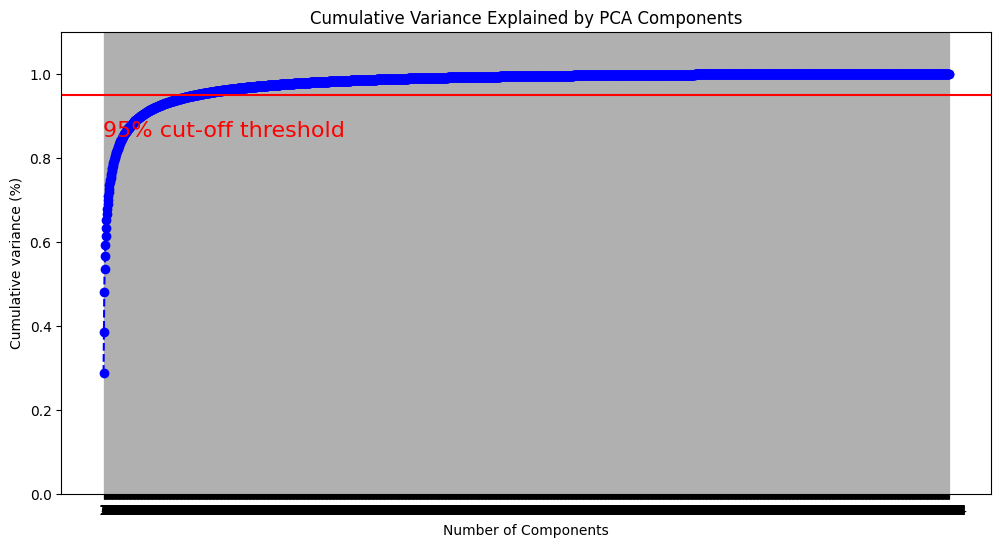

In [15]:
fig, ax = plt.subplots()

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('Cumulative Variance Explained by PCA Components')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.xticks(np.arange(1, n_components + 1, step=1))
plt.show()


Determine Optimal Number of Components: Find the smallest number of components where the cumulative variance is at least 95%.

In [16]:
optimal_components = np.argmax(y >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 256


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [17]:
from sklearn.model_selection import train_test_split

X = np.array(df['pixels'].tolist()) 
y = df['emotion']

## splitting data into train/val/test subsets here
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
pca = PCA(n_components=optimal_components) 
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [20]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=2, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Original Data - Validation Accuracy: {accuracy:.4f}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Original Data - Validation Accuracy: 0.3678


In [21]:
grid_search_pca = GridSearchCV(rf_classifier, param_grid, cv=2, verbose=1)
grid_search_pca.fit(X_train_pca, y_train)

best_rf_pca = grid_search_pca.best_estimator_
y_pred_pca = best_rf_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_pred_pca)
print(f"PCA Transformed Data - Validation Accuracy: {accuracy_pca:.4f}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
PCA Transformed Data - Validation Accuracy: 0.3052


In [25]:
# Apply SVC
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1],
    'degree': [6],
    'kernel': ['poly']
}

svc = SVC(random_state=42)
grid_search_svc = GridSearchCV(svc, param_grid, cv=2, verbose=1)
grid_search_svc.fit(X_train, y_train)

best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_val)
accuracy_svc = accuracy_score(y_val, y_pred_svc)
print(f"Original Data - Validation Accuracy: {accuracy_svc:.4f}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Original Data - Validation Accuracy: 0.3080


In [26]:
grid_search_pca_svc = GridSearchCV(svc, param_grid, cv=2, verbose=1)
grid_search_pca_svc.fit(X_train_pca, y_train)

best_svc_pca = grid_search_pca_svc.best_estimator_
y_pred_pca_svc = best_svc_pca.predict(X_val_pca)
accuracy_pca_svc = accuracy_score(y_val, y_pred_pca_svc)
print(f"PCA Transformed Data - Validation Accuracy: {accuracy_pca_svc:.4f}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
PCA Transformed Data - Validation Accuracy: 0.3109


In [22]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [1],
    'solver': ['saga'],
    'max_iter': [200]
}

log_reg = LogisticRegression(random_state=42, multi_class="multinomial", verbose=1)
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=2, verbose=1)
grid_search_log_reg.fit(X_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
print(f"Original Data - Validation Accuracy: {accuracy_log_reg:.4f}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits


/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.23317869
Epoch 3, change: 0.21133462
Epoch 4, change: 0.11971815
Epoch 5, change: 0.10830005
Epoch 6, change: 0.08142391
Epoch 7, change: 0.07346251
Epoch 8, change: 0.06312383
Epoch 9, change: 0.05928705
Epoch 10, change: 0.05179900
Epoch 11, change: 0.04899245
Epoch 12, change: 0.04661520
Epoch 13, change: 0.04275772
Epoch 14, change: 0.04093733
Epoch 15, change: 0.03897707
Epoch 16, change: 0.03704692
Epoch 17, change: 0.03539404
Epoch 18, change: 0.03343889
Epoch 19, change: 0.03201174
Epoch 20, change: 0.03046742
Epoch 21, change: 0.02921336
Epoch 22, change: 0.02763404
Epoch 23, change: 0.02682946
Epoch 24, change: 0.02555425
Epoch 25, change: 0.02465032
Epoch 26, change: 0.02386650
Epoch 27, change: 0.02301109
Epoch 28, change: 0.02216312
Epoch 29, change: 0.02154129
Epoch 30, change: 0.02077474
Epoch 31, change: 0.02012870
Epoch 32, change: 0.01960753
Epoch 33, change: 0.01886199
Epoch 34, change: 0.01819586
Epoch 35, change: 0.017

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.20596630
Epoch 3, change: 0.14211842
Epoch 4, change: 0.13332781
Epoch 5, change: 0.07721123
Epoch 6, change: 0.06630392
Epoch 7, change: 0.05846418
Epoch 8, change: 0.05201861
Epoch 9, change: 0.04727433
Epoch 10, change: 0.04330036
Epoch 11, change: 0.03998087
Epoch 12, change: 0.03731522
Epoch 13, change: 0.03526997
Epoch 14, change: 0.03357907
Epoch 15, change: 0.03149508
Epoch 16, change: 0.03058616
Epoch 17, change: 0.02908193
Epoch 18, change: 0.02859303
Epoch 19, change: 0.02755830
Epoch 20, change: 0.02706447
Epoch 21, change: 0.02594101
Epoch 22, change: 0.02582536
Epoch 23, change: 0.02513689
Epoch 24, change: 0.02471373
Epoch 25, change: 0.02374927
Epoch 26, change: 0.02373864
Epoch 27, change: 0.02310926
Epoch 28, change: 0.02255891
Epoch 29, change: 0.02219281
Epoch 30, change: 0.02149233
Epoch 31, change: 0.02086250
Epoch 32, change: 0.02085950
Epoch 33, change: 0.02064677
Epoch 34, change: 0.01966058
Epoch 35, change: 0.019

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.23328037
Epoch 3, change: 0.21461349
Epoch 4, change: 0.12128343
Epoch 5, change: 0.10962126
Epoch 6, change: 0.08206427
Epoch 7, change: 0.07382869
Epoch 8, change: 0.06284136
Epoch 9, change: 0.05956209
Epoch 10, change: 0.05207695
Epoch 11, change: 0.04953400
Epoch 12, change: 0.04716066
Epoch 13, change: 0.04346778
Epoch 14, change: 0.04151393
Epoch 15, change: 0.03955492
Epoch 16, change: 0.03773253
Epoch 17, change: 0.03604016
Epoch 18, change: 0.03397448
Epoch 19, change: 0.03260986
Epoch 20, change: 0.03102453
Epoch 21, change: 0.02976139
Epoch 22, change: 0.02836637
Epoch 23, change: 0.02759518
Epoch 24, change: 0.02602317
Epoch 25, change: 0.02547805
Epoch 26, change: 0.02456148
Epoch 27, change: 0.02378013
Epoch 28, change: 0.02282973
Epoch 29, change: 0.02200324
Epoch 30, change: 0.02120361
Epoch 31, change: 0.02049083
Epoch 32, change: 0.01998916
Epoch 33, change: 0.01917645
Epoch 34, change: 0.01842260
Epoch 35, change: 0.018

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.20815329
Epoch 3, change: 0.14284915
Epoch 4, change: 0.13501473
Epoch 5, change: 0.07886600
Epoch 6, change: 0.06849421
Epoch 7, change: 0.06008996
Epoch 8, change: 0.05323223
Epoch 9, change: 0.04808658
Epoch 10, change: 0.04457051
Epoch 11, change: 0.04106669
Epoch 12, change: 0.03840451
Epoch 13, change: 0.03617558
Epoch 14, change: 0.03440571
Epoch 15, change: 0.03224614
Epoch 16, change: 0.03174896
Epoch 17, change: 0.03029573
Epoch 18, change: 0.02995573
Epoch 19, change: 0.02876884
Epoch 20, change: 0.02829575
Epoch 21, change: 0.02703788
Epoch 22, change: 0.02681378
Epoch 23, change: 0.02606852
Epoch 24, change: 0.02562144
Epoch 25, change: 0.02457521
Epoch 26, change: 0.02457017
Epoch 27, change: 0.02390915
Epoch 28, change: 0.02336702
Epoch 29, change: 0.02296991
Epoch 30, change: 0.02219236
Epoch 31, change: 0.02145014
Epoch 32, change: 0.02151118
Epoch 33, change: 0.02124086
Epoch 34, change: 0.02022364
Epoch 35, change: 0.019

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.27465407
Epoch 3, change: 0.19449423
Epoch 4, change: 0.14972543
Epoch 5, change: 0.09918950
Epoch 6, change: 0.08518747
Epoch 7, change: 0.07720897
Epoch 8, change: 0.06958702
Epoch 9, change: 0.06806177
Epoch 10, change: 0.06274208
Epoch 11, change: 0.06194179
Epoch 12, change: 0.05770067
Epoch 13, change: 0.05465848
Epoch 14, change: 0.05091197
Epoch 15, change: 0.04836654
Epoch 16, change: 0.04484633
Epoch 17, change: 0.04144939
Epoch 18, change: 0.03957779
Epoch 19, change: 0.03696978
Epoch 20, change: 0.03502984
Epoch 21, change: 0.03321202
Epoch 22, change: 0.03078112
Epoch 23, change: 0.02942936
Epoch 24, change: 0.02814367
Epoch 25, change: 0.02676675
Epoch 26, change: 0.02552840
Epoch 27, change: 0.02428693
Epoch 28, change: 0.02348597
Epoch 29, change: 0.02255692
Epoch 30, change: 0.02156930
Epoch 31, change: 0.02075864
Epoch 32, change: 0.02003345
Epoch 33, change: 0.01939505
Epoch 34, change: 0.01868560
Epoch 35, change: 0.017

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
log_reg_pca = LogisticRegression(random_state=42, multi_class="multinomial", verbose=1)
grid_search_log_reg_pca = GridSearchCV(log_reg_pca, param_grid, cv=2, verbose=1)
grid_search_log_reg_pca.fit(X_train_pca, y_train)

best_log_reg_pca = grid_search_log_reg_pca.best_estimator_
y_pred_log_reg_pca = best_log_reg_pca.predict(X_val_pca)
accuracy_log_reg_pca = accuracy_score(y_val, y_pred_log_reg)
print(f"PCA Transformed Data - Validation Accuracy: {accuracy_log_reg_pca:.4f}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Epoch 1, change: 1.00000000


/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 2, change: 0.28584540
Epoch 3, change: 0.16727432
Epoch 4, change: 0.11251881
Epoch 5, change: 0.07760967
Epoch 6, change: 0.06366222
Epoch 7, change: 0.05787279
Epoch 8, change: 0.05336077
Epoch 9, change: 0.04805024
Epoch 10, change: 0.04430795
Epoch 11, change: 0.04097070
Epoch 12, change: 0.03793700
Epoch 13, change: 0.03403928
Epoch 14, change: 0.03167064
Epoch 15, change: 0.02936441
Epoch 16, change: 0.02693817
Epoch 17, change: 0.02429446
Epoch 18, change: 0.02268080
Epoch 19, change: 0.02070800
Epoch 20, change: 0.01911947
Epoch 21, change: 0.01761271
Epoch 22, change: 0.01627659
Epoch 23, change: 0.01581752
Epoch 24, change: 0.01545090
Epoch 25, change: 0.01507350
Epoch 26, change: 0.01480516
Epoch 27, change: 0.01447417
Epoch 28, change: 0.01418420
Epoch 29, change: 0.01382182
Epoch 30, change: 0.01351206
Epoch 31, change: 0.01334233
Epoch 32, change: 0.01316838
Epoch 33, change: 0.01284730
Epoch 34, change: 0.01269993
Epoch 35, change: 0.01247229
Epoch 36, change: 0.01

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.33257198
Epoch 3, change: 0.18790055
Epoch 4, change: 0.13030637
Epoch 5, change: 0.10022522
Epoch 6, change: 0.08949612
Epoch 7, change: 0.07386385
Epoch 8, change: 0.06176136
Epoch 9, change: 0.05119989
Epoch 10, change: 0.04405198
Epoch 11, change: 0.03611531
Epoch 12, change: 0.03291841
Epoch 13, change: 0.03023304
Epoch 14, change: 0.02731916
Epoch 15, change: 0.02564172
Epoch 16, change: 0.02347621
Epoch 17, change: 0.02172663
Epoch 18, change: 0.02015474
Epoch 19, change: 0.01867316
Epoch 20, change: 0.01784024
Epoch 21, change: 0.01722197
Epoch 22, change: 0.01669829
Epoch 23, change: 0.01652833
Epoch 24, change: 0.01625381
Epoch 25, change: 0.01561896
Epoch 26, change: 0.01532389
Epoch 27, change: 0.01493872
Epoch 28, change: 0.01450451
Epoch 29, change: 0.01449719
Epoch 30, change: 0.01411533
Epoch 31, change: 0.01394763
Epoch 32, change: 0.01356511
Epoch 33, change: 0.01340328
Epoch 34, change: 0.01305450
Epoch 35, change: 0.012

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.28595308
Epoch 3, change: 0.16715627
Epoch 4, change: 0.11291643
Epoch 5, change: 0.07822940
Epoch 6, change: 0.06444334
Epoch 7, change: 0.05861958
Epoch 8, change: 0.05401484
Epoch 9, change: 0.04857870
Epoch 10, change: 0.04477391
Epoch 11, change: 0.04145566
Epoch 12, change: 0.03834036
Epoch 13, change: 0.03419449
Epoch 14, change: 0.03162426
Epoch 15, change: 0.02924969
Epoch 16, change: 0.02670444
Epoch 17, change: 0.02406961
Epoch 18, change: 0.02245240
Epoch 19, change: 0.02047342
Epoch 20, change: 0.01888546
Epoch 21, change: 0.01744732
Epoch 22, change: 0.01676559
Epoch 23, change: 0.01632218
Epoch 24, change: 0.01594821
Epoch 25, change: 0.01555770
Epoch 26, change: 0.01528445
Epoch 27, change: 0.01492745
Epoch 28, change: 0.01463601
Epoch 29, change: 0.01426109
Epoch 30, change: 0.01393492
Epoch 31, change: 0.01376806
Epoch 32, change: 0.01358652
Epoch 33, change: 0.01325907
Epoch 34, change: 0.01310193
Epoch 35, change: 0.012

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 3, change: 0.18764555
Epoch 4, change: 0.13121635
Epoch 5, change: 0.10151930
Epoch 6, change: 0.09068212
Epoch 7, change: 0.07446198
Epoch 8, change: 0.06227128
Epoch 9, change: 0.05167649
Epoch 10, change: 0.04447098
Epoch 11, change: 0.03640952
Epoch 12, change: 0.03292629
Epoch 13, change: 0.03018729
Epoch 14, change: 0.02725233
Epoch 15, change: 0.02553685
Epoch 16, change: 0.02334652
Epoch 17, change: 0.02159995
Epoch 18, change: 0.02000510
Epoch 19, change: 0.01864530
Epoch 20, change: 0.01821994
Epoch 21, change: 0.01758397
Epoch 22, change: 0.01703334
Epoch 23, change: 0.01685405
Epoch 24, change: 0.01657276
Epoch 25, change: 0.01589982
Epoch 26, change: 0.01559291
Epoch 27, change: 0.01519094
Epoch 28, change: 0.01472490
Epoch 29, change: 0.01470311
Epoch 30, change: 0.01430930
Epoch 31, change: 0.01412466
Epoch 32, change: 0.01372497
Epoch 33, change: 0.01354929
Epoch 34, change: 0.01317823
Epoch 35, change: 0.01296387
Epoch 36, change: 0.01279579
Epoch 37, change: 0.0

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch 1, change: 1.00000000
Epoch 2, change: 0.34490749
Epoch 3, change: 0.19414257
Epoch 4, change: 0.10065968
Epoch 5, change: 0.07538317
Epoch 6, change: 0.05552598
Epoch 7, change: 0.04894459
Epoch 8, change: 0.04103317
Epoch 9, change: 0.03775988
Epoch 10, change: 0.03368395
Epoch 11, change: 0.03325890
Epoch 12, change: 0.03141419
Epoch 13, change: 0.03039110
Epoch 14, change: 0.02864234
Epoch 15, change: 0.02769951
Epoch 16, change: 0.02716607
Epoch 17, change: 0.02493526
Epoch 18, change: 0.02404836
Epoch 19, change: 0.02282618
Epoch 20, change: 0.02209725
Epoch 21, change: 0.02128930
Epoch 22, change: 0.02040015
Epoch 23, change: 0.01975787
Epoch 24, change: 0.01911474
Epoch 25, change: 0.01869991
Epoch 26, change: 0.01833021
Epoch 27, change: 0.01786314
Epoch 28, change: 0.01742636
Epoch 29, change: 0.01700724
Epoch 30, change: 0.01653698
Epoch 31, change: 0.01621542
Epoch 32, change: 0.01560709
Epoch 33, change: 0.01543791
Epoch 34, change: 0.01473731
Epoch 35, change: 0.014

/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
# Apply MLP Classifier
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(100,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [200]
}

mlp = MLPClassifier(random_state=42)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=2, verbose=1)
grid_search_mlp.fit(X_train, y_train)

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_val)
accuracy_mlp = accuracy_score(y_val, y_pred_mlp)
print(f"Original Data - Validation Accuracy: {accuracy_mlp:.4f}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Original Data - Validation Accuracy: 0.3711


In [28]:
mlp_pca = MLPClassifier(random_state=42)
grid_search_mlp_pca = GridSearchCV(mlp_pca, param_grid, cv=2, verbose=1)
grid_search_mlp_pca.fit(X_train_pca, y_train)

best_mlp_pca = grid_search_mlp_pca.best_estimator_
y_pred_mlp_pca = best_mlp_pca.predict(X_val_pca)
accuracy_mlp_pca = accuracy_score(y_val, y_pred_mlp_pca)
print(f"PCA Transformed Data - Validation Accuracy: {accuracy_mlp_pca:.4f}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


PCA Transformed Data - Validation Accuracy: 0.3469


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [42]:
from sklearn.metrics import classification_report

def calculate_performance(model, model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print(f"Classification Report for {model_name}:")
    print(report)

Plot confusion matrices

In [34]:
from sklearn.metrics import confusion_matrix

models = [
    (best_rf, "Random Forest", accuracy),
    (best_svc, "SVC", accuracy_svc),
    (best_log_reg, "Logistic Regression", accuracy_log_reg),
    (best_mlp, "MLP Classifier", accuracy_mlp),
]

pca_models = [
    (best_rf_pca, "Random Forest with PCA", accuracy_pca),
    (best_svc_pca, "SVC with PCA", accuracy_pca_svc),
    (best_log_reg_pca, "Logistic Regression with PCA", accuracy_log_reg_pca),
    (best_mlp_pca, "MLP Classifier with PCA", accuracy_mlp_pca)
]

def plot_confusion_matrices(models, axes):
    for i, (model, model_name, accuracy) in enumerate(models):
        cm = confusion_matrix(y_val, model.predict(X_val))

        # Plot confusion matrix in the corresponding subplot
        ax = axes[i]  # Select subplot directly using index 'i'
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(f'{model_name}\nAccuracy: {accuracy:.2f}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

        # Add text annotations to the confusion matrix
        for j in range(cm.shape[0]):
            for k in range(cm.shape[1]):
                ax.text(k, j, cm[j, k], ha='center', va='center',
                        color='white' if cm[j, k] > cm.max() / 2. else 'black')

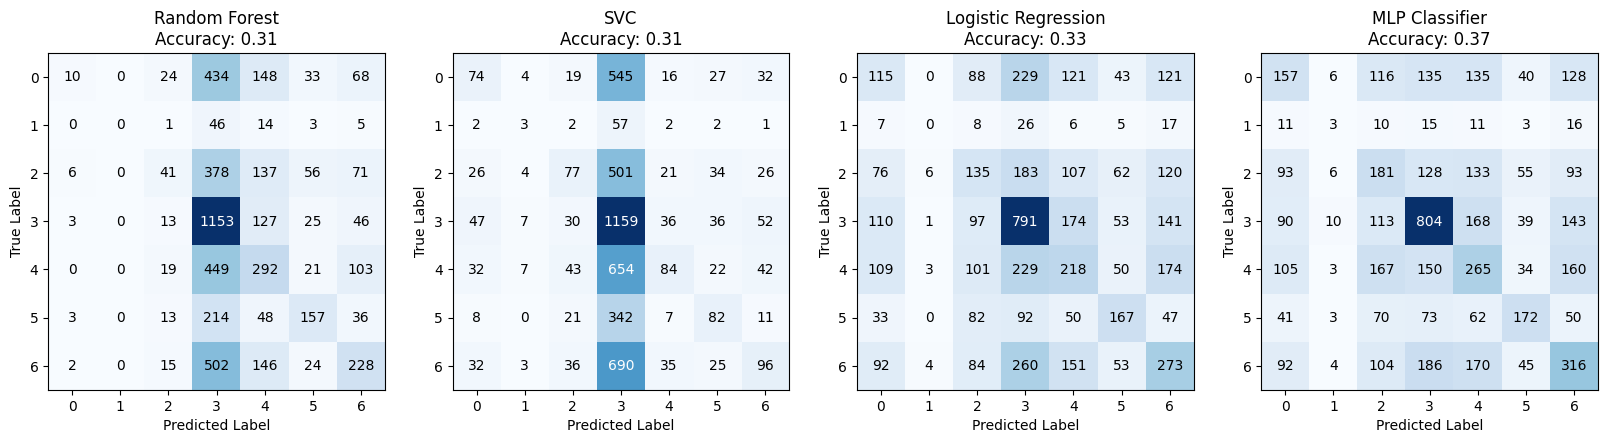

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

plot_confusion_matrices(models, axes)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## visualize the confusion matrices and classification reports here
# a) Original Data
y_pred = best_rf.predict(X_test)  # Predict using best model on the test set

print("----- Original Data Performance -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(classification_report(y_test, y_pred)) # Provides per-class metrics

# b) PCA Transformed Data
y_pred_pca = best_rf_pca.predict(X_test_pca)  # Predict on the test set

print("\n----- PCA Transformed Data Performance -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_pca, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_pca, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_pca, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_pca)) # Provides per-class metrics

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.42      0.01      0.03       717
           1       0.00      0.00      0.00        69
           2       0.33      0.06      0.10       689
           3       0.36      0.84      0.51      1367
           4       0.32      0.33      0.33       884
           5       0.49      0.33      0.40       471
           6       0.41      0.25      0.31       917

    accuracy                           0.37      5114
   macro avg       0.33      0.26      0.24      5114
weighted avg       0.37      0.37      0.30      5114



/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [50]:
calculate_performance(best_svc, "SVC", y_val, y_pred_svc)

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.33      0.10      0.16       717
           1       0.11      0.04      0.06        69
           2       0.34      0.11      0.17       689
           3       0.29      0.85      0.44      1367
           4       0.42      0.10      0.15       884
           5       0.36      0.17      0.23       471
           6       0.37      0.10      0.16       917

    accuracy                           0.31      5114
   macro avg       0.32      0.21      0.20      5114
weighted avg       0.34      0.31      0.24      5114



In [51]:
calculate_performance(best_log_reg, "Logistic Regression", y_val, y_pred_log_reg)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.21      0.16      0.18       717
           1       0.00      0.00      0.00        69
           2       0.23      0.20      0.21       689
           3       0.44      0.58      0.50      1367
           4       0.26      0.25      0.25       884
           5       0.39      0.35      0.37       471
           6       0.31      0.30      0.30       917

    accuracy                           0.33      5114
   macro avg       0.26      0.26      0.26      5114
weighted avg       0.31      0.33      0.32      5114



In [52]:
calculate_performance(best_mlp, "MLP Classifier", y_val, y_pred_mlp)

Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       717
           1       0.09      0.04      0.06        69
           2       0.24      0.26      0.25       689
           3       0.54      0.59      0.56      1367
           4       0.28      0.30      0.29       884
           5       0.44      0.37      0.40       471
           6       0.35      0.34      0.35       917

    accuracy                           0.37      5114
   macro avg       0.31      0.30      0.31      5114
weighted avg       0.37      0.37      0.37      5114



In [53]:
calculate_performance(best_rf_pca, "Random Forest with PCA", y_val, y_pred_pca)

Classification Report for Random Forest with PCA:
              precision    recall  f1-score   support

           0       0.57      0.01      0.01       717
           1       0.00      0.00      0.00        69
           2       0.36      0.02      0.03       689
           3       0.29      0.97      0.45      1367
           4       0.37      0.10      0.15       884
           5       0.66      0.10      0.18       471
           6       0.39      0.09      0.15       917

    accuracy                           0.31      5114
   macro avg       0.38      0.18      0.14      5114
weighted avg       0.40      0.31      0.20      5114



/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nhan.nguyen/Documents/Fundamental-ML/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [54]:
calculate_performance(best_svc_pca, "SVC with PCA", y_val, y_pred_pca_svc)

Classification Report for SVC with PCA:
              precision    recall  f1-score   support

           0       0.31      0.11      0.16       717
           1       0.12      0.06      0.08        69
           2       0.35      0.12      0.18       689
           3       0.30      0.84      0.44      1367
           4       0.40      0.10      0.16       884
           5       0.37      0.18      0.25       471
           6       0.37      0.11      0.17       917

    accuracy                           0.31      5114
   macro avg       0.32      0.22      0.20      5114
weighted avg       0.34      0.31      0.25      5114



In [55]:
calculate_performance(best_log_reg_pca, "Logistic Regression with PCA", y_val, y_pred_log_reg_pca)

Classification Report for Logistic Regression with PCA:
              precision    recall  f1-score   support

           0       0.26      0.14      0.18       717
           1       0.08      0.01      0.02        69
           2       0.23      0.12      0.16       689
           3       0.44      0.68      0.53      1367
           4       0.28      0.28      0.28       884
           5       0.40      0.38      0.39       471
           6       0.35      0.35      0.35       917

    accuracy                           0.36      5114
   macro avg       0.29      0.28      0.27      5114
weighted avg       0.33      0.36      0.34      5114



In [56]:
calculate_performance(best_mlp_pca, "MLP Classifier with PCA", y_val, y_pred_mlp_pca)

Classification Report for MLP Classifier with PCA:
              precision    recall  f1-score   support

           0       0.23      0.25      0.24       717
           1       0.18      0.16      0.17        69
           2       0.25      0.25      0.25       689
           3       0.52      0.49      0.50      1367
           4       0.27      0.28      0.27       884
           5       0.39      0.40      0.40       471
           6       0.34      0.34      0.34       917

    accuracy                           0.35      5114
   macro avg       0.31      0.31      0.31      5114
weighted avg       0.35      0.35      0.35      5114



- Among the evaluated CLF models, MLP (Multilayer Perceptron) emerges as the top performer across both original and PCA-transformed datasets. It achieves the highest F1-score among all models, including SVM, Decision Tree, Random Forest, and others. This strong performance highlights MLP's ability to effectively learn complex relationships within the data and generalize well to unseen data.

- MLP's precision score on PCA-transformed data is particularly noteworthy, demonstrating its capability to accurately identify positive instances with minimal false positives. Overall, MLP proves to be the most reliable model for this classification task based on the provided evaluation metrics.